In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/titanic/train.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Import Libraries

In [2]:
# We Will Import the Libraries that we need.
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC
from imblearn.combine import SMOTETomek 
from imblearn.over_sampling import SMOTE

In [3]:
#notice: Disable all warnings 
import warnings
warnings.filterwarnings('ignore')

# Import the Data

In [4]:
test = pd.read_csv('/kaggle/input/titanic/test.csv')
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
gender_submission = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
gender_submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


# Look at the Data

## Train Datatraintrain

In [7]:
train.shape

(891, 12)

In [8]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
train.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [10]:
train.duplicated().sum()

0

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [13]:
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

## Test Data

In [14]:
test.shape

(418, 11)

In [15]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [16]:
test.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
413    False
414    False
415    False
416    False
417    False
Length: 418, dtype: bool

In [17]:
test.duplicated().sum()

0

In [18]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [19]:
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [20]:
test.nunique()

PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

## gender_submission

In [21]:
gender_submission.shape

(418, 2)

In [22]:
gender_submission.columns

Index(['PassengerId', 'Survived'], dtype='object')

In [23]:
gender_submission.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
413    False
414    False
415    False
416    False
417    False
Length: 418, dtype: bool

In [24]:
gender_submission.duplicated().sum()

0

In [25]:
gender_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [26]:
gender_submission.dtypes

PassengerId    int64
Survived       int64
dtype: object

In [27]:
gender_submission.nunique()

PassengerId    418
Survived         2
dtype: int64

# Data Tuning

## Train Data

In [28]:
train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace= True, axis=1)

In [29]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


## Test Data

In [30]:
test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace= True, axis=1)

In [31]:
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


# Data Visualization

In [32]:
drr = train.copy()
drr

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [33]:
# Matrix form for correlation data
drrr= train.corr()
drrr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

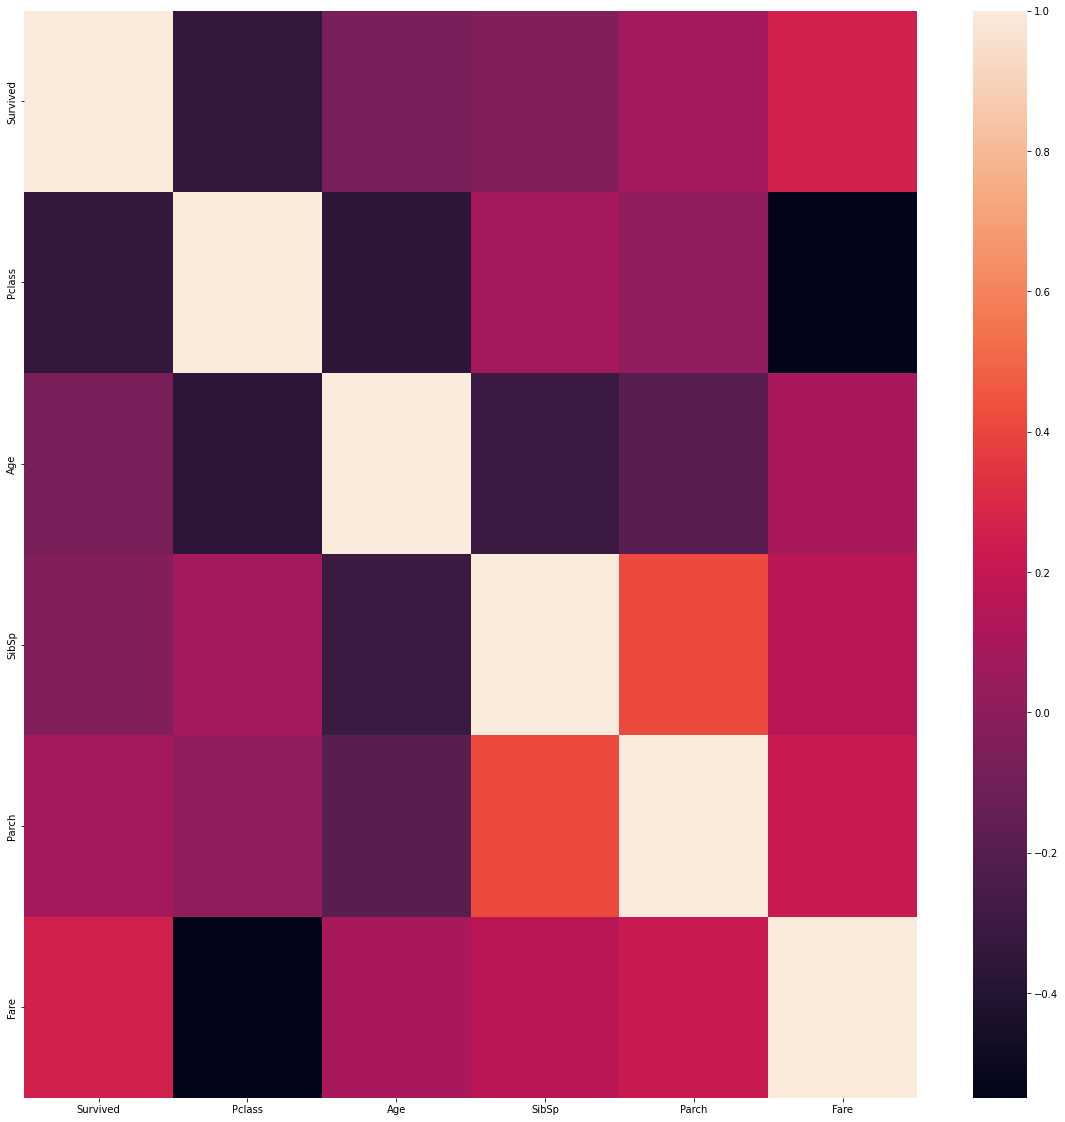

In [34]:
# We here looking at the data Visualization by heatmap.
plt.figure(figsize=(20,20))
sns.heatmap(drrr)

<AxesSubplot:>

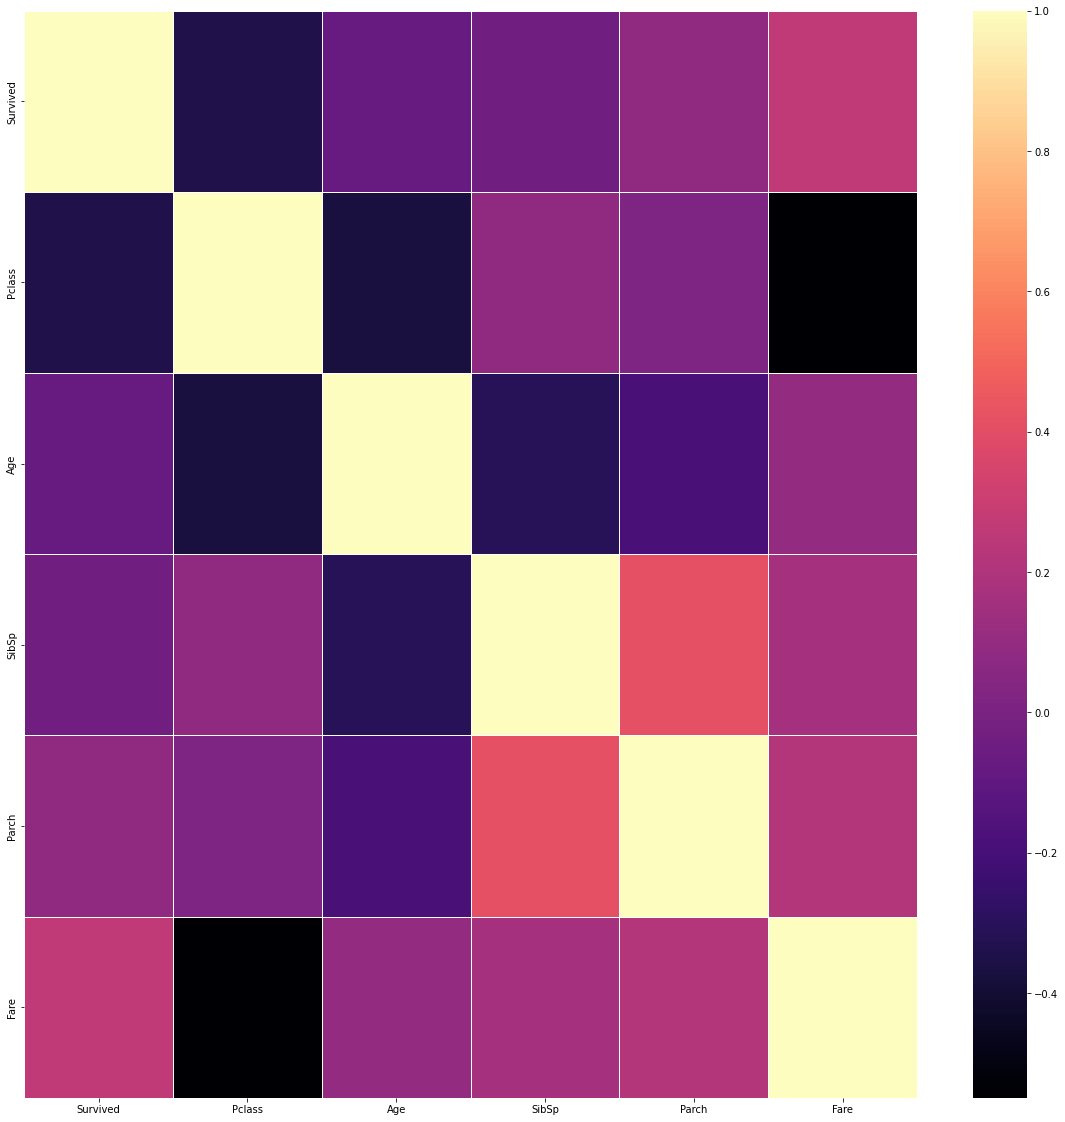

In [35]:
# Another method to looking at the data Visualization by heatmap.
plt.figure(figsize=(20,20))
sns.heatmap(drrr,cmap='magma',linecolor='white',linewidths=1)

<AxesSubplot:>

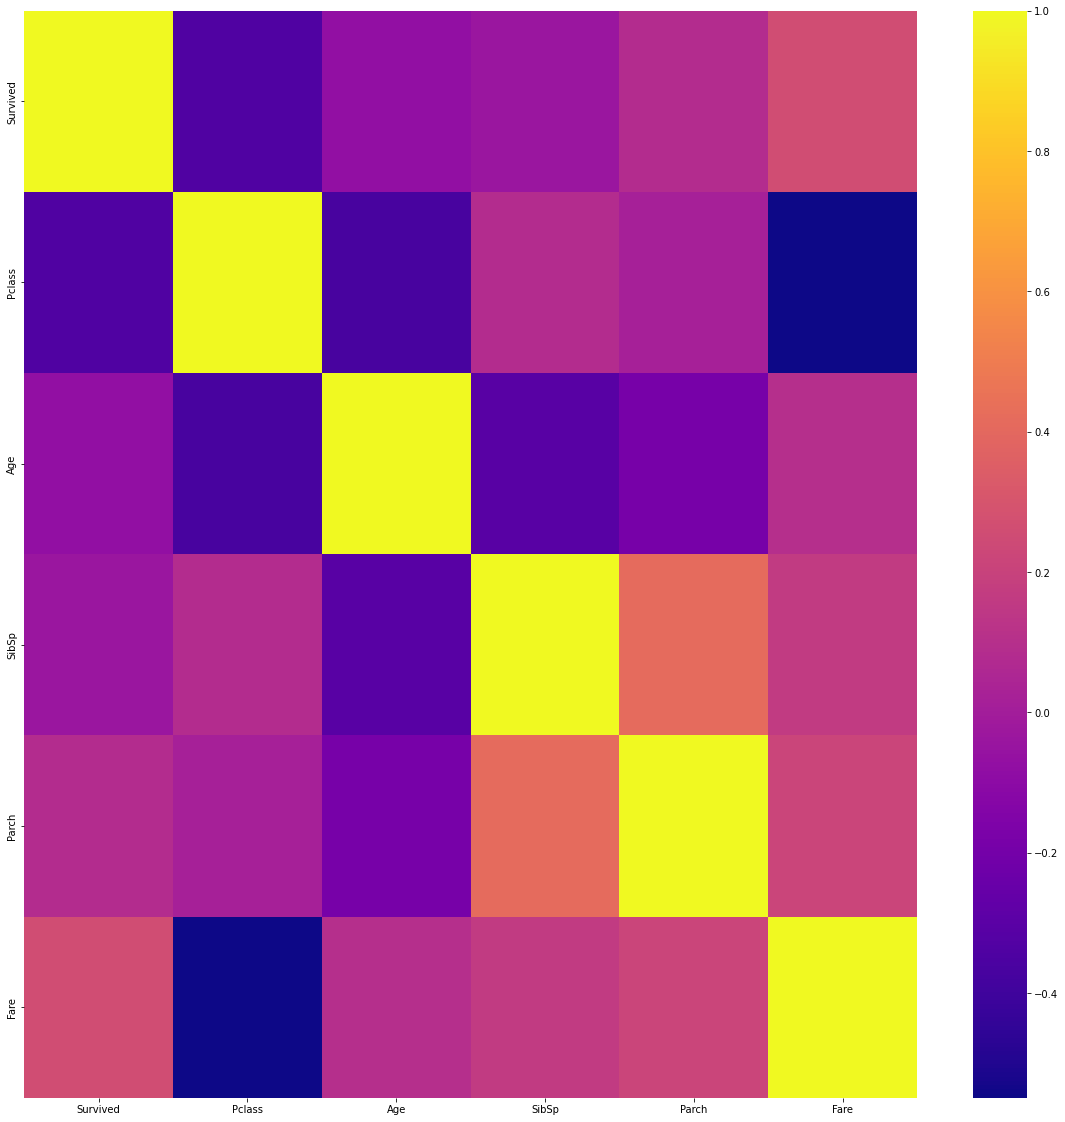

In [36]:
plt.figure(figsize=(20,20))
sns.heatmap(drrr,cmap='plasma',)

<AxesSubplot:>

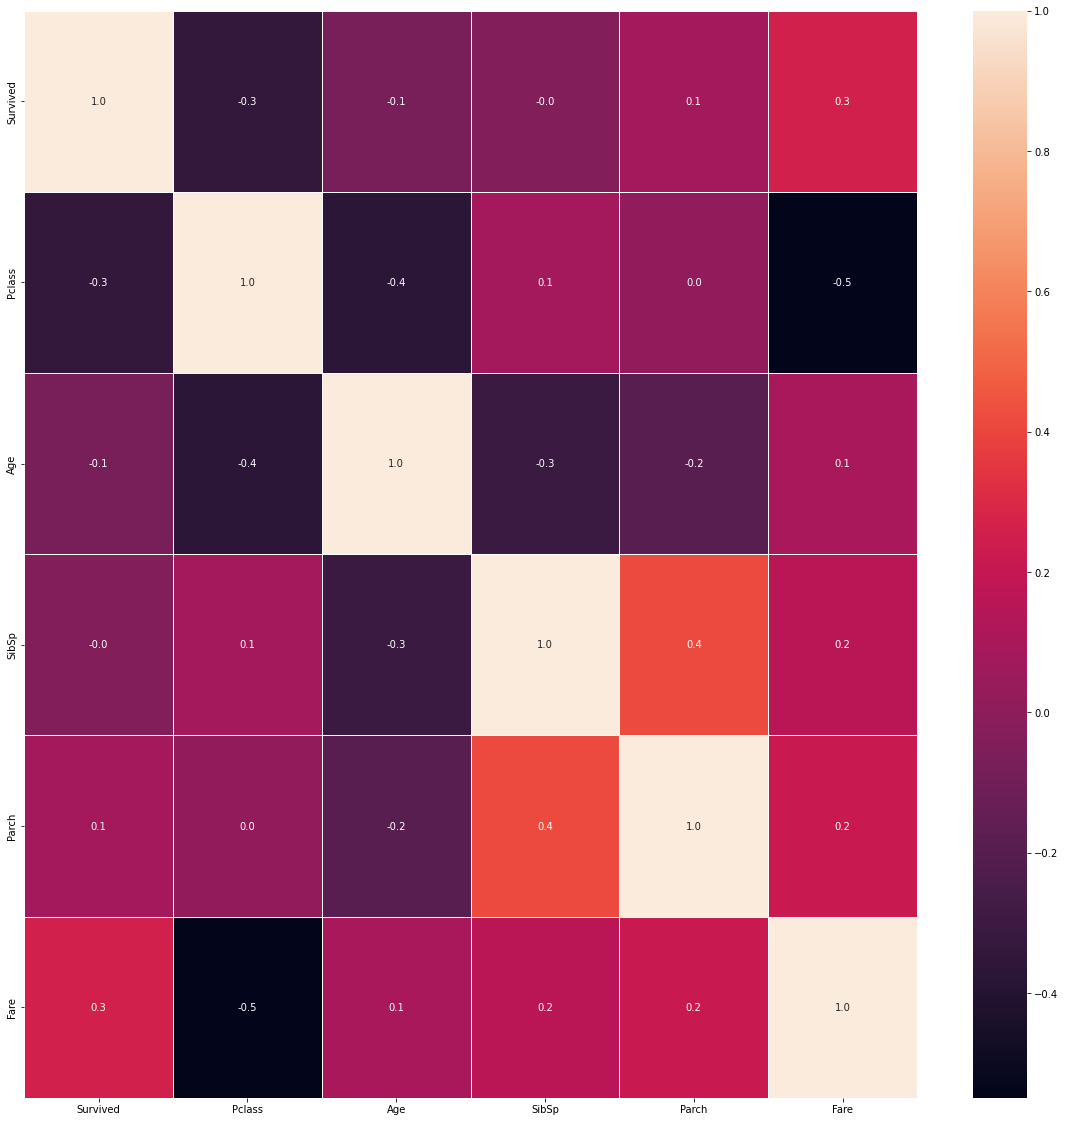

In [37]:
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(drrr, annot=True, linewidths=.5, fmt= '.1f',ax=ax)

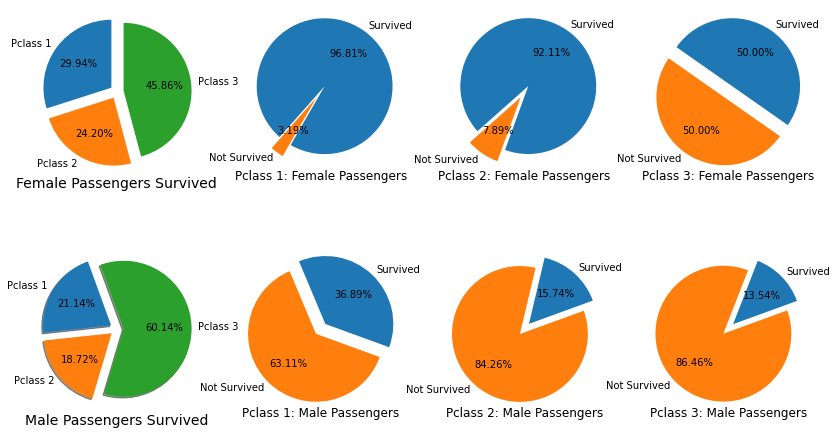

In [38]:
plt.figure(figsize=(14,8))
labels = ["Survived","Not Survived"]
Pclass = ["Pclass 1","Pclass 2","Pclass 3"]
female = [29.94,24.20,45.86]
male = [21.14,18.72,60.14]

plt.subplot(2,4,1)
plt.pie(female, labels=Pclass, explode=(0.1,0.1,0.1), autopct="%.2f%%", startangle=90)
plt.title("Female Passengers Survived", y=-0.1, fontsize=14)

plt.subplot(2,4,2)
plt.pie([96.81,3.19], labels=labels, explode=(0.1,0.1), autopct="%.2f%%", startangle=240)
plt.title("Pclass 1: Female Passengers", y=-0.05)

plt.subplot(2,4,3)
plt.pie([92.11,7.89], labels=labels, explode=(0.1,0.1), autopct="%.2f%%", startangle=250)
plt.title("Pclass 2: Female Passengers", y=-0.05)

plt.subplot(2,4,4)
plt.pie([50,50], labels=labels, explode=(0.1,0.1), autopct="%.2f%%", startangle=-35)
plt.title("Pclass 3: Female Passengers", y=-0.05)

plt.subplot(2,4,5)
plt.pie(male, labels=Pclass, explode=(0.1,0.1,0.1), autopct="%.2f%%", shadow=True, startangle=110)
plt.title("Male Passengers Survived", y=-0.1, fontsize=14)

plt.subplot(2,4,6)
plt.pie([36.89,63.11], labels=labels, explode=(0.1,0.1), autopct="%.2f%%", startangle=-20)
plt.title("Pclass 1: Male Passengers", y=-0.05)

plt.subplot(2,4,7)
plt.pie([15.74,84.26], labels=labels, explode=(0.1,0.1), autopct="%.2f%%", startangle=20)
plt.title("Pclass 2: Male Passengers", y=-0.05)

plt.subplot(2,4,8)
plt.pie([13.54,86.46], labels=labels, explode=(0.1,0.1), autopct="%.2f%%", startangle=20)
plt.title("Pclass 3: Male Passengers", y=-0.05);

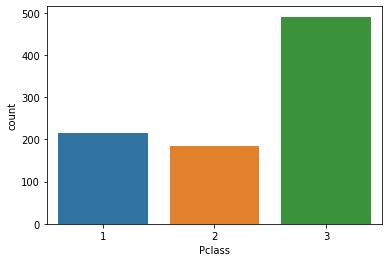

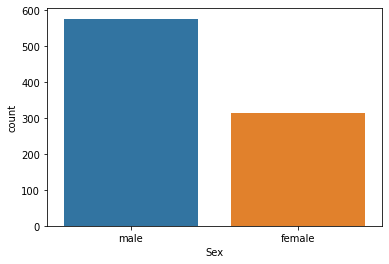

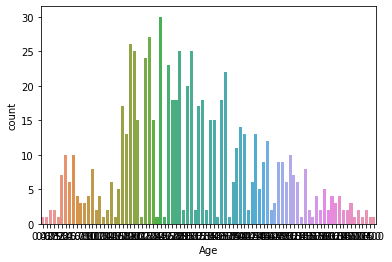

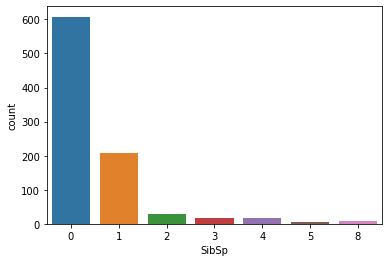

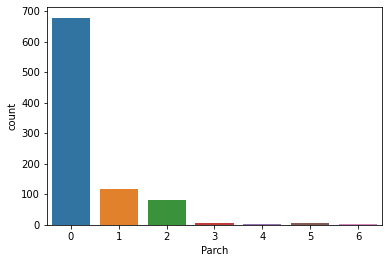

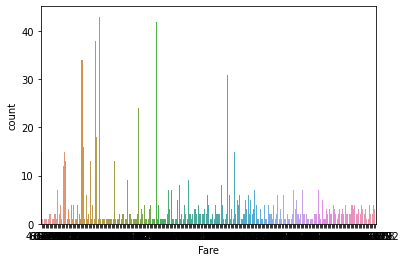

In [39]:
# Original data.
for i in drr.loc[:, ~drr.columns.isin(["Survived", "Embarked"])]:
    f = sns.countplot(x=drr[i]);
    plt.show()

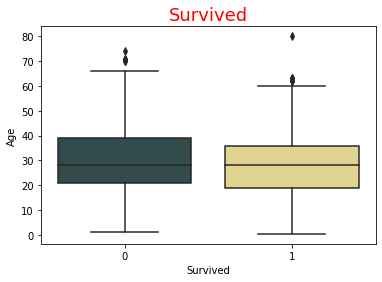

In [40]:
sns.boxplot(x="Survived", y="Age",data=drr,palette=sns.color_palette(["#2f4f4f","#eedd82"]))
plt.title("Survived",fontsize=18, color="red");

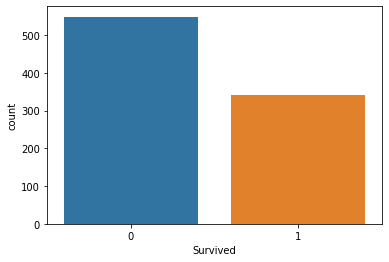

In [41]:
f = sns.countplot(x=drr['Survived']);
plt.show()

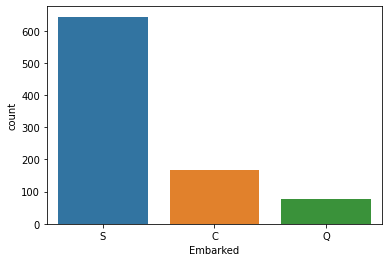

In [42]:
f = sns.countplot(x=drr['Embarked']);
plt.show()

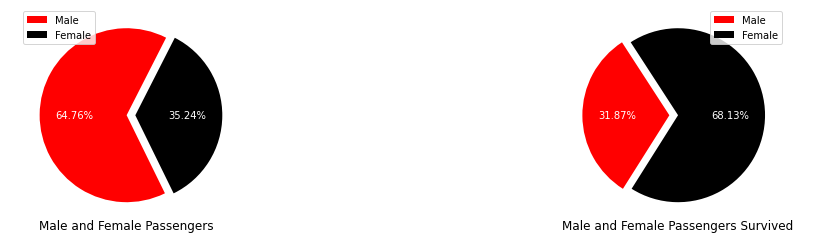

In [43]:
plt.figure(figsize=(14,4))
sex = ["Male","Female"]
values = drr["Sex"].value_counts()
survived = drr[drr["Survived"]==1]["Sex"].value_counts().sort_values(ascending=True)
color = ["#FF0000","#000000"]

plt.subplot(1,3,1)
plt.pie(values, labels=sex, colors=color, explode=(0,0.1), textprops={"color":"w"}, autopct="%.2f%%", startangle=63)
plt.title("Male and Female Passengers", y=-0.05)
plt.legend()

plt.subplot(1,3,3)
plt.pie(survived, labels=sex, colors=color, explode=(0.1,0), textprops={"color":"w"}, autopct="%.2f%%", startangle=123)
plt.title("Male and Female Passengers Survived", y=-0.05)
plt.legend();

# Splitting

## Define dependant & independant

In [44]:
x_trainn = train.drop(['Survived'],axis=1)
x_trainn

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,NaN,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [45]:
y_train = train['Survived']
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [46]:
X_test = test.copy()
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


In [47]:
y_test = gender_submission['Survived']
y_test

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

## Categorical & Numerical

### For Train Data

#### Categorical Data

In [48]:
categorical_data = x_trainn[['Sex', 'Embarked']]
categorical_data

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S
...,...,...
886,male,S
887,female,S
888,female,S
889,male,C


#### Numerical Data

In [49]:
numerical_data= x_trainn.drop(categorical_data, axis= 1)
numerical_data

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500
...,...,...,...,...,...
886,2,27.0,0,0,13.0000
887,1,19.0,0,0,30.0000
888,3,NaN,1,2,23.4500
889,1,26.0,0,0,30.0000


### For Test Data

#### Categorical data

In [50]:
categorical_data_test = X_test[['Sex', 'Embarked']]
categorical_data_test

,Sex,Embarked
0,male,Q
1,female,S
2,male,Q
3,male,S
4,female,S
...,...,...
413,male,S
414,female,C
415,male,S
416,male,S


#### Numerical data

In [51]:
numerical_data_test = X_test.drop(categorical_data_test, axis= 1)
numerical_data_test

,Pclass,Age,SibSp,Parch,Fare
0,3,34.5,0,0,7.8292
1,3,47.0,1,0,7.0000
2,2,62.0,0,0,9.6875
3,3,27.0,0,0,8.6625
4,3,22.0,1,1,12.2875
...,...,...,...,...,...
413,3,NaN,0,0,8.0500
414,1,39.0,0,0,108.9000
415,3,38.5,0,0,7.2500
416,3,NaN,0,0,8.0500


# Preprocessing

## Label Encoding

In [52]:
# We Will do preprocessing for Label Encoding.
le = preprocessing.LabelEncoder()

## For Train Data

In [53]:
# In this step we will compute and apply the transformation in a single step.
# Create an instance of categorical_data with apply fit_transform.
label_encoder=categorical_data.apply(le.fit_transform)
label_encoder

,Sex,Embarked
0,1,2
1,0,0
2,0,2
3,0,2
4,1,2
...,...,...
886,1,2
887,0,2
888,0,2
889,1,0


In [54]:
# we Here we have created a new data frame that includes numerical_data and label_encoder.
data_label_encoded = pd.concat([numerical_data, label_encoder], axis=1)
data_label_encoded

,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
0,3,22.0,1,0,7.2500,1,2
1,1,38.0,1,0,71.2833,0,0
2,3,26.0,0,0,7.9250,0,2
3,1,35.0,1,0,53.1000,0,2
4,3,35.0,0,0,8.0500,1,2
...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1,2
887,1,19.0,0,0,30.0000,0,2
888,3,NaN,1,2,23.4500,0,2
889,1,26.0,0,0,30.0000,1,0


## For Test Data

In [55]:
# In this step we will compute and apply the transformation in a single step.
# Create an instance of categorical_data with apply fit_transform.
label_encoder_test = categorical_data_test.apply(le.fit_transform)
label_encoder_test

,Sex,Embarked
0,1,1
1,0,2
2,1,1
3,1,2
4,0,2
...,...,...
413,1,2
414,0,0
415,1,2
416,1,2


In [56]:
# we Here we have created a new data frame that includes numerical_data and label_encoder.
data_label_encoded_test = pd.concat([numerical_data_test, label_encoder_test], axis=1)
data_label_encoded_test

,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
0,3,34.5,0,0,7.8292,1,1
1,3,47.0,1,0,7.0000,0,2
2,2,62.0,0,0,9.6875,1,1
3,3,27.0,0,0,8.6625,1,2
4,3,22.0,1,1,12.2875,0,2
...,...,...,...,...,...,...,...
413,3,NaN,0,0,8.0500,1,2
414,1,39.0,0,0,108.9000,0,0
415,3,38.5,0,0,7.2500,1,2
416,3,NaN,0,0,8.0500,1,2


## Define Missing Data

#### Train Data

In [57]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan ,strategy = 'mean' )
z = imputer.fit_transform(data_label_encoded) #X.values returns np array of the value of X data frame, z's type is np array
z

array([[ 3.        , 22.        ,  1.        , ...,  7.25      ,
         1.        ,  2.        ],
       [ 1.        , 38.        ,  1.        , ..., 71.2833    ,
         0.        ,  0.        ],
       [ 3.        , 26.        ,  0.        , ...,  7.925     ,
         0.        ,  2.        ],
       ...,
       [ 3.        , 29.69911765,  1.        , ..., 23.45      ,
         0.        ,  2.        ],
       [ 1.        , 26.        ,  0.        , ..., 30.        ,
         1.        ,  0.        ],
       [ 3.        , 32.        ,  0.        , ...,  7.75      ,
         1.        ,  1.        ]])

#### Test Data

In [58]:
z_test = imputer.transform(data_label_encoded_test)
z_test

array([[ 3.        , 34.5       ,  0.        , ...,  7.8292    ,
         1.        ,  1.        ],
       [ 3.        , 47.        ,  1.        , ...,  7.        ,
         0.        ,  2.        ],
       [ 2.        , 62.        ,  0.        , ...,  9.6875    ,
         1.        ,  1.        ],
       ...,
       [ 3.        , 38.5       ,  0.        , ...,  7.25      ,
         1.        ,  2.        ],
       [ 3.        , 29.69911765,  0.        , ...,  8.05      ,
         1.        ,  2.        ],
       [ 3.        , 29.69911765,  1.        , ..., 22.3583    ,
         1.        ,  0.        ]])

## ADD Scaling

In [59]:
# preprocessing.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [60]:
x_train = scaler.fit_transform(z)
x_train

array([[ 0.82737724, -0.5924806 ,  0.43279337, ..., -0.50244517,
         0.73769513,  0.58111394],
       [-1.56610693,  0.63878901,  0.43279337, ...,  0.78684529,
        -1.35557354, -1.93846038],
       [ 0.82737724, -0.2846632 , -0.4745452 , ..., -0.48885426,
        -1.35557354,  0.58111394],
       ...,
       [ 0.82737724,  0.        ,  0.43279337, ..., -0.17626324,
        -1.35557354,  0.58111394],
       [-1.56610693, -0.2846632 , -0.4745452 , ..., -0.04438104,
         0.73769513, -1.93846038],
       [ 0.82737724,  0.17706291, -0.4745452 , ..., -0.49237783,
         0.73769513, -0.67867322]])

In [61]:
x_test = scaler.transform(z_test)
x_test

array([[ 0.82737724,  0.36944878, -0.4745452 , ..., -0.49078316,
         0.73769513, -0.67867322],
       [ 0.82737724,  1.33137817,  0.43279337, ..., -0.50747884,
        -1.35557354,  0.58111394],
       [-0.36936484,  2.48569343, -0.4745452 , ..., -0.45336687,
         0.73769513, -0.67867322],
       ...,
       [ 0.82737724,  0.67726619, -0.4745452 , ..., -0.50244517,
         0.73769513,  0.58111394],
       [ 0.82737724,  0.        , -0.4745452 , ..., -0.48633742,
         0.73769513,  0.58111394],
       [ 0.82737724,  0.        ,  0.43279337, ..., -0.19824428,
         0.73769513, -1.93846038]])

# Model

## XGBoost

In [62]:
# we assign the output to an object called model.
model = xgb.XGBClassifier(random_state=55)

In [63]:
# Here, we are using XGBClassifier as a Machine Learning model to fit the data.
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=55,
              reg_alpha=0, reg_lambda=1, ...)

In [64]:
# Now we have predicted the output by passing x_test and also stored real target in expected_y.
expected_y  = y_test
predicted_y = model.predict(x_test)

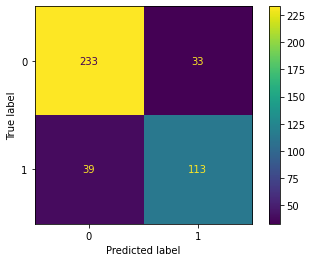

In [65]:
# We will plotting the confusion matrix.
plot_confusion_matrix(model , x_test, y_test)

In [66]:
# Here we have printed confusion matrix for the classifier.
print(confusion_matrix(expected_y, predicted_y))

[[233  33]
 [ 39 113]]


In [67]:
# Here we have printed classification report for the classifier.
print(classification_report(expected_y, predicted_y))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       266
           1       0.77      0.74      0.76       152

    accuracy                           0.83       418
   macro avg       0.82      0.81      0.81       418
weighted avg       0.83      0.83      0.83       418



## Logestic Regression

In [68]:
# Next, we need to create our model by instantiating an instance of the LogisticRegression object.
model_ = LogisticRegression(random_state=1)

In [69]:
# To train the model, we need to call the fit method on the LogisticRegression object we just created and pass in our 
# x_train and y_train variables
model_.fit(x_train, y_train)

LogisticRegression(random_state=1)

In [70]:
# Making Predictions With Our Logistic Regression Model
predictions = model_.predict(x_test)

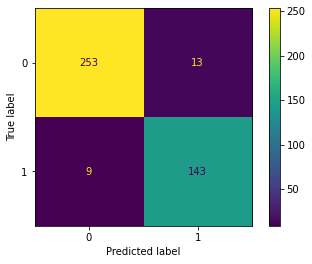

In [71]:
# We will plotting the confusion matrix.
plot_confusion_matrix(model_, x_test, y_test)

In [72]:
# Here we have printed confusion matrix for the classifier.
print(confusion_matrix(y_test, predictions))

[[253  13]
 [  9 143]]


In [73]:
# Here we have printed classification report for the classifier.
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       266
           1       0.92      0.94      0.93       152

    accuracy                           0.95       418
   macro avg       0.94      0.95      0.94       418
weighted avg       0.95      0.95      0.95       418



## Random Forest

In [74]:
# create regressor object
Classifier = RandomForestClassifier(n_estimators=20, random_state=0)

In [75]:
# fit the regressor with x and y data
Classifier.fit(x_train, y_train) 

RandomForestClassifier(n_estimators=20, random_state=0)

In [76]:
# Now we have predicted the output by passing x_test and also stored real target in expected_y.
y_pred = Classifier.predict(x_test)

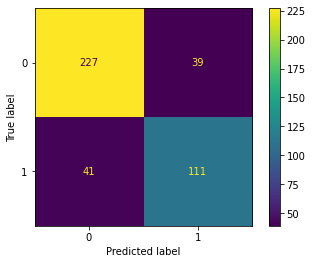

In [77]:
# We will plotting the confusion matrix.
plot_confusion_matrix(Classifier , x_test, y_test)

In [78]:
# Here we have printed confusion matrix for the classifier.
print(confusion_matrix(y_test,y_pred))

[[227  39]
 [ 41 111]]


In [79]:
# Here we have printed classification report for the classifier.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       266
           1       0.74      0.73      0.74       152

    accuracy                           0.81       418
   macro avg       0.79      0.79      0.79       418
weighted avg       0.81      0.81      0.81       418



## K-Nearest Neighbors(KNN)

In [80]:
# Next, we need to create our model by instantiating an instance of the K-Nearest Neighbors(KNN) object.
knn = KNeighborsClassifier()

In [81]:
# To train the model, we need to call the fit method on the K-Nearest Neighbors(KNN) object we just created and pass in our 
# x_train and y_train variables
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [82]:
# Making Predictions With Our K-Nearest Neighbors(KNN) Model.
predictions_ = knn.predict(x_test)

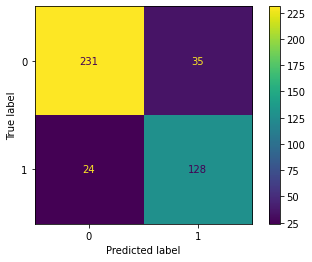

In [83]:
# We will plotting the confusion matrix.
plot_confusion_matrix(knn, x_test, y_test)

In [84]:
# Here we have printed confusion matrix for the classifier.
print(confusion_matrix(y_test, predictions_))

[[231  35]
 [ 24 128]]


In [85]:
# Here we have printed classification report for the classifier.
print(classification_report(y_test, predictions_))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       266
           1       0.79      0.84      0.81       152

    accuracy                           0.86       418
   macro avg       0.85      0.86      0.85       418
weighted avg       0.86      0.86      0.86       418



## Naive Bayes

In [86]:
# Next, we need to create our model by instantiating an instance of the Naive Bayes object.
model_1 = GaussianNB()

In [87]:
# To train the model, we need to call the fit method on the Naive Bayes object we just created and pass in our 
# x_train and y_train variables
model_1.fit(x_train, y_train)

GaussianNB()

In [88]:
# Making Predictions With Our Naive Bayes Model.
predictions_1 = model_1.predict(x_test)

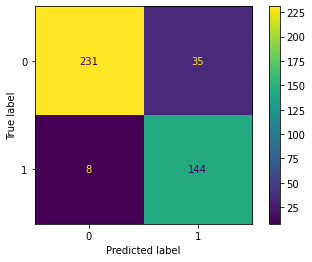

In [89]:
# We will plotting the confusion matrix.
plot_confusion_matrix(model_1, x_test, y_test)

In [90]:
# Here we have printed confusion matrix for the classifier.
print(confusion_matrix(y_test, predictions_1))

[[231  35]
 [  8 144]]


In [91]:
# Here we have printed classification_report for the classifier.
print(classification_report(y_test, predictions_1))

              precision    recall  f1-score   support

           0       0.97      0.87      0.91       266
           1       0.80      0.95      0.87       152

    accuracy                           0.90       418
   macro avg       0.89      0.91      0.89       418
weighted avg       0.91      0.90      0.90       418



##  Support Vector Machines(SVM)

In [92]:
from sklearn.svm import SVC

In [93]:
clf = SVC(gamma='auto')

In [94]:
clf.fit(x_train, y_train)

SVC(gamma='auto')

In [95]:
predictions_svm = clf.predict(x_test)

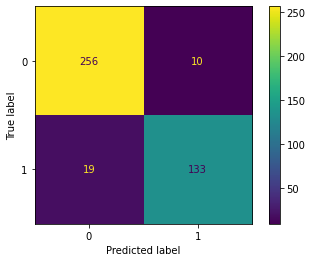

In [96]:
# We will plotting the confusion matrix.
plot_confusion_matrix(clf, x_test, y_test)

In [97]:
# Here we have printed confusion matrix for the classifier.
print(confusion_matrix(y_test, predictions_svm))

[[256  10]
 [ 19 133]]


In [98]:
# Here we have printed classification_report for the classifier.
print(classification_report(y_test, predictions_svm))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       266
           1       0.93      0.88      0.90       152

    accuracy                           0.93       418
   macro avg       0.93      0.92      0.92       418
weighted avg       0.93      0.93      0.93       418

